# Application on real dataset

We apply the method on real data, here on diabetes dataset (scikit learn). The dataset can be found here : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

### Import codes and dataset

In [ ]:
import main as vb
import numpy as np
import importlib
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
importlib.reload(vb)

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [3]:
# load dataset
df = datasets.load_diabetes()

### Construct design matrix $X$, response vector $Y$ and test set.

In [4]:
X = np.zeros((70, 100))
for i in range(70):
    X[i] = np.outer(df['data'][i], df['data'][i]).flatten()

Y = df['target'][:70]

In [20]:
X_test = np.zeros((100, 100))
for i in range(100):
    X_test[i] = np.outer(df['data'][i+70], df['data'][i+70]).flatten()

Y_test = df['target'][70:170]

### Apply the algorithm with Laplace prior slabs

Here the dimension is equal to $p=100$ and there are $n=70$ samples. 

In [8]:
# initialize
p = 100 
mu_0 = vb.mu_0(X, Y)
sigma_0 = 2*np.random.random(p)
gamma_0 = np.random.random(p)

mu_laplace, sigma_laplace, gamma_laplace = vb.variational_laplace(X, Y, sigma_0, gamma_0, mu_0, a0=1, b0=p, lamb=0.1, eps=1e-4, max_it=5000)

100%|██████████| 5000/5000 [1:23:28<00:00,  1.00s/it]


In [9]:
counts_laplace = np.unique(gamma_laplace == 1, return_counts=True)
counts_laplace

(array([False,  True]), array([70, 30]))

The regression parameter $\theta$ is sparse $(s=70)$.

In [10]:
# construct predictions
theta_laplace = gamma_laplace * np.random.normal(mu_laplace, sigma_laplace)
results_laplace = X @ theta_laplace

### Then vizualize the results

#### a) Values of $\theta$

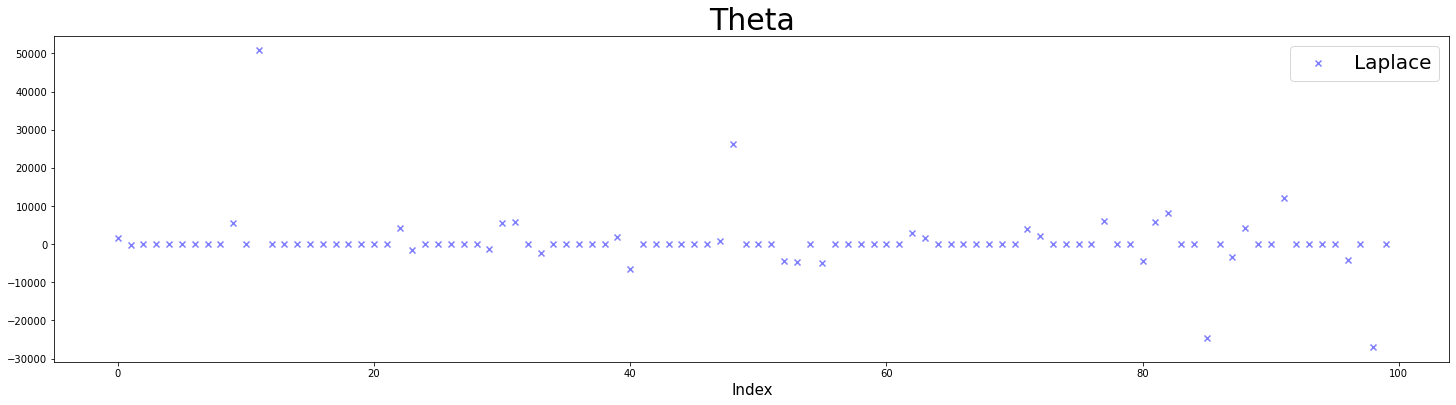

In [16]:
fig = plt.figure(figsize=(25,6))
#plt.scatter(np.arange(len(theta_generative)), theta_generative, color='red', marker='o', alpha=0.7, label='True value')
plt.scatter(np.arange(len(theta_laplace)), theta_laplace, color='blue', marker='x', alpha=0.5, label='Laplace')
#plt.scatter(np.arange(len(theta_gaussian)), theta_gaussian, color='green', marker='v', alpha=0.5, label='Gaussian')
plt.legend(fontsize=20)
plt.title('Theta', size=30)
plt.xlabel('Index',size=15)
fig.savefig('theta_real_data.pdf', bbox_inches='tight')
plt.show()

#### b) Comparison of predictions and the real values

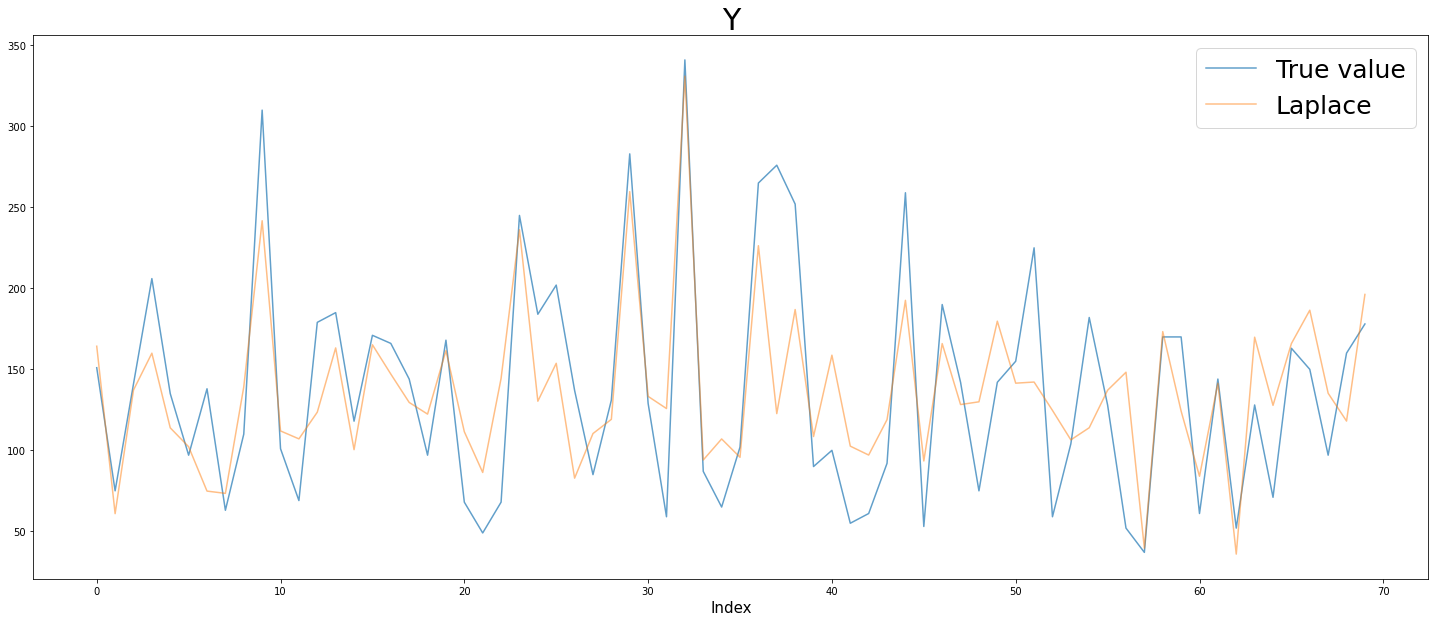

In [17]:
fig = plt.figure(figsize=(25,10))
plt.plot(Y, alpha=0.7, label='True value')
plt.plot(results_laplace, alpha=0.5, label='Laplace')
plt.legend(fontsize=25)
plt.title('Y', size=30)
plt.xlabel('Index',size=15)
fig.savefig('reconstruction_real_data.pdf', bbox_inches='tight')
plt.show()

In [13]:
l2_loss = np.sum((Y - results_laplace)**2)/np.linalg.norm(Y)

In [14]:
l2_loss

102.12650021971598

### Now predict testing set

In [21]:
results_laplace_test = X_test @ theta_laplace

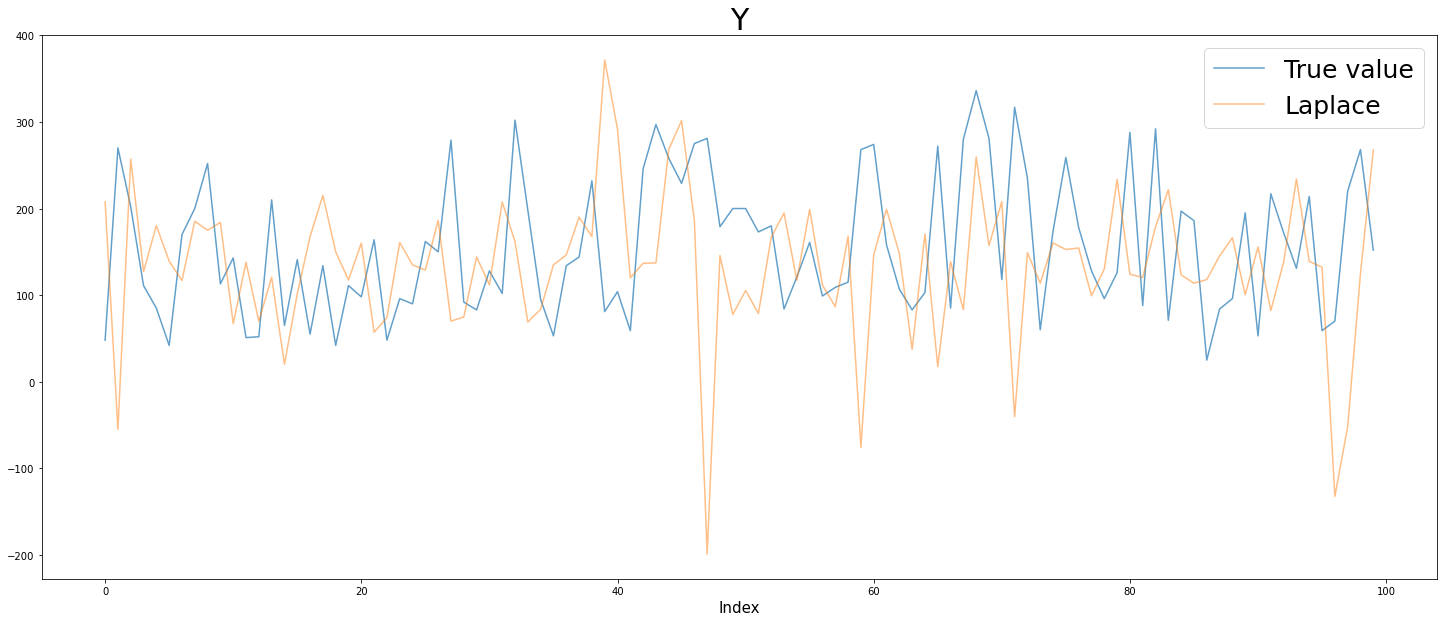

In [22]:
fig = plt.figure(figsize=(25,10))
plt.plot(Y_test, alpha=0.7, label='True value')
plt.plot(results_laplace_test, alpha=0.5, label='Laplace')
plt.legend(fontsize=25)
plt.title('Y', size=30)
plt.xlabel('Index',size=15)
fig.savefig('reconstruction_real_data_test.pdf', bbox_inches='tight')
plt.show()